$$
\newcommand{\RR}{\mathbb{R}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$


## L3 Mathématiques - 2023/24 - Univ. Paris-Saclay
## Analyse théorique et numérique des EDO 
---------------------------------------------------------------------------------------------------------------

## TP 3 : schémas numériques pour les EDO. Convergence et ordre.
---------------------------------------------------------------------------------------------------------------

## Partie 1 - CC. 
#### <font color='red'>A déposer à la fin sur ecampus, dans la page principal de MEU304, dans le dépôt nommé CC2 groupe_mardi_15h45 (ou à envoyer par mail à jean-baptiste.apoung-kamga@universite-paris-saclay.fr ).</font>


Soient $t_0,\ y_0\in\R,\ f:\R\times\R\longrightarrow\R$, et considérons le problème de Cauchy  
\begin{equation*}
(PC)\ \ \ \ \ \begin{cases}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0.
\end{cases} 
\end{equation*}

On suppose que ce problème a une unique solution $y:J\longrightarrow\mathbb{R}$ définie dans un intervalle $J\subseteq\mathbb{R}.$ On s'intéresse à approcher $y$ dans un intervalle de la forme $[t_0, t_0+T]\subseteq J$, avec $T>0$. 

Pour ce faire : 

 - on se donne $N\in\mathbb{N}$ ;
 
 - on définit $h=\frac{T}{N}$  ;
 
 - on définit une sub-division de $[t_0,t_0+T]$ donnée par les **N+1** points $t_n=t_0+n h,\ n=0,\dots,N$ ;

 - on définit des valeurs approchées $y^0,\ y^1,\cdots,\ y^N$ de la solution exacte $t\mapsto y(t)$ de $(PC)$ aux points $t_0,\ t_1,\cdots,\ t_N$ par le schéma suivant :

$$
\begin{cases}
y^0&=y_0,\\
y^{n+1}&=y^{n} + \frac h2 \big(f(t_n,y^{n})+f(t_{n+1},\tilde{y}_{n+1})\big),\\
&\ \ \ \ \textrm{où}\ \ \ \tilde{y}_{n+1}=y^{n} + h f\big(t_n+\frac h2,y^{n}+\frac h2 f(t_{n},y^n)\big),\ \ \ \ \ \ \textrm{pour }\ n\in\{0,\dots,N-1\}.
\end{cases}
$$  

**Question 1.** Écrire une fonction python de la forme

`mon_schema(t0, T, y0, h, f)`

(ou de la forme `mon_schema(t0,T,y0,N,f)`, si vous préférez que votre fonction prenne en argument $N$ au lieu de $h$),
prenant en argument  l'instant initiale **t0**, la longueur **T** de l'intervalle de temps $[t_0,t_0+T],$ la donnée initiale $y_0$, le pas de temps $h$ (ou le nombre de points $N$) et la fonction $f$ définissant le second membre de l'EDO. Cette fonction devra retourner deux vecteurs : 

- $[t_0,\, t_1,\, ...,\, t_N],$  tableau `numpy` unidimensionnel de taille $(N+1)$ représentant la subdivision de l'intervalle $[t_0,t_0+T]$ de pas $h$ considérée, 

- $[y_0,\, y_1,\, ...,\, y_N],$ tableau `numpy` de taille $(N+1)$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N.$

(vous pouvez aussi définir ces vecteurs sous forme de listes).


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## Question 1
def mon_schema(t0, T, y0, h, f):
    t = np.arange(t0,t0+T+h,h)
    y = np.zeros(t.shape)
    y[0] = y0
    y_tild = y
    N = len(t) - 1
    for n in range(N):
        y_tild[n+1] = y[n] + h * f(t[n] + (h/2), y[n] + (h/2) * f(t[n],y[n]))
        y[n+1] = y[n] + (h/2) * (f(t[n],y[n]) + f(t[n+1],y_tild[n+1]))
    return t,y

**Question 2.** On considère le problème de Cauchy 

\begin{equation*}
(P)\ \ \ \ \ \begin{cases}
  y'(t) & =  y+\sin(t)y^2 \\
  y(0) & =  1.
\end{cases} 
\end{equation*}

On souhaite approcher la solution de cette équation **dans l'intervalle $[0,0.5]$**.

*Remarque : la solution exacte de $(P)$ est $y(t)=\displaystyle{\frac{1}{\frac12e^{-t}+\frac{\cos(t)-\sin(t)}{2}}}.$*


**Question 2.** Calculer la solution approchée de $(P)$ obtenue par cette méthode numérique dans l'intervalle de temps $[0,0.5]$, pour $N=100$. Tracer sur une même fenêtre graphique la solution exacte et la solution approchée. Rajouter des légendes et un titre à votre graphique.

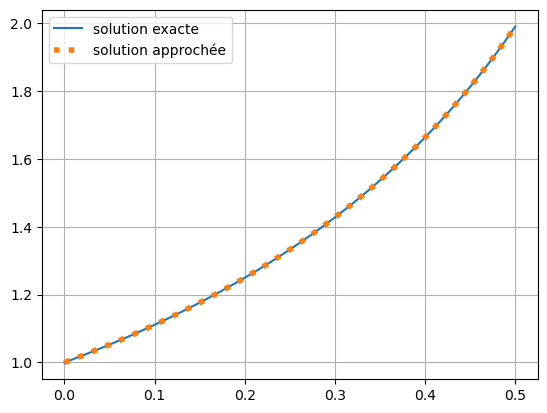

In [3]:
## Question 2

# f second membre de l'EDO
def f(t,y):
    return y + np.sin(t)*y**2

# sol. exacte de (P)
def yex(t):
    return 1/(1/2 * np.exp(-t) + (np.cos(t)-np.sin(t))/2)

#Données du problème
t0, T, N, y0 = 0, 0.5, 100, 1
h = T/N

#Données du graphique
tt,yy = mon_schema(t0, T, y0, h, f)
t = np.linspace(t0,T,N+1)

plt.figure()
plt.plot(t,yex(t),label='solution exacte')
plt.plot(tt,yy,label='solution approchée',ls=':',lw=4)
plt.grid()
plt.legend()

**Question 3.** Calculez les solutions approchées de $(P)$ obtenues avec cette méthode numérique, avec $h=0.5/2^s$ (ou $N=2^{s}$) pour $s = 2,3,...,10$. 

- **3.1** Représentez dans la même figure la différence en valeur absolue entre la solution exacte et la solution approchée, en fonction du temps, pour chaque valeur de $h$. 

- **3.2** Calculez, pour chaque valeur de $h$, l'erreur globale 
\begin{equation*}
E_h =  \max_{n=0,\cdots,N}( |y(t_n)-y^{n}|), 
\end{equation*} avec $t\mapsto y(t)$ la solution exacte de $(P)$, et, pour chaque $h=T/N$, $(y^0,\dots,y^N)$ la solution approchée associée à une discrétisation de pas $h$.  
- **3.2.1** Représentez dans la même figure $E_h/h$ et $E_h/h^2$ en fonction de $N$ (pour ce faire, gardez les valeurs de $E_h$, de $h$ et de $N$, pour $s=2,...,10$, dans des listes ou des tableaux numpy).
- **3.2.2** Représentez dans  une autre figure, en échelle logarithmique, l'erreur $E_h$ en fonction du pas de temps $h$, autrement dit, représentez $\log(E_h)$ en fonction de $\log(h)$. Vous devez obtenir des points qui sont à peu près alignés sur une droites. Vérifiez graphiquement que c'est le cas, en représentant des droites de pente $1$ et $2$ (pour ce faire, représentez respectivement $log(h)$ en fonction de $log(h)$ et $2log(h)$ en fonction de $log(h)$). Vérifiez que tous les points semblent être dans une droite paralèlle à une de ces deux droites.

- **3.3** Que semblent montrer les figures des questions 3.2.1 et 3.2.2 sur la convergence du schéma ?


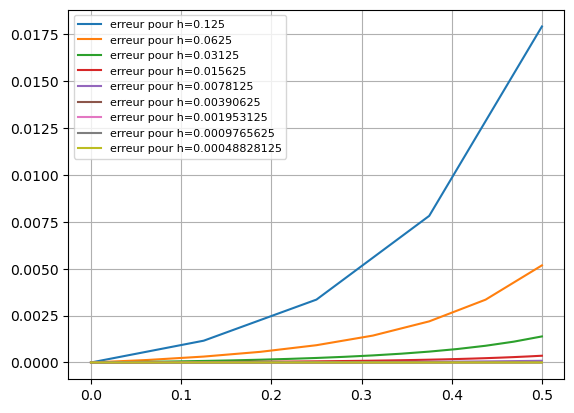

In [7]:
# Question 3
#données du problème
t0, T, y0 = 0, 0.5, 1
N = 2**np.arange(2,11)
H = [T/n for n in N]

for h in H:
    tt,yy = mon_schema(t0, T, y0, h, f)
    t = np.linspace(t0,T,int(T/h)+1)
    E = abs(yex(t) - yy)
    plt.plot(t,E, label=f'erreur pour h={h}')

plt.legend(fontsize = 8)
plt.grid()  

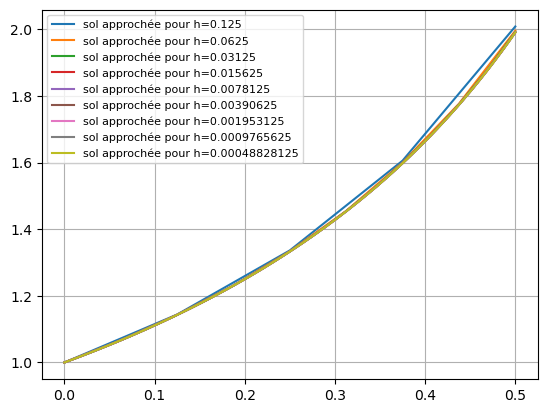

In [8]:
for h in H:
    tt,yy = mon_schema(t0, T, y0, h, f)
    plt.plot(tt,yy,label=f'sol approchée pour h={h}')

plt.legend(fontsize = 8)
plt.grid()

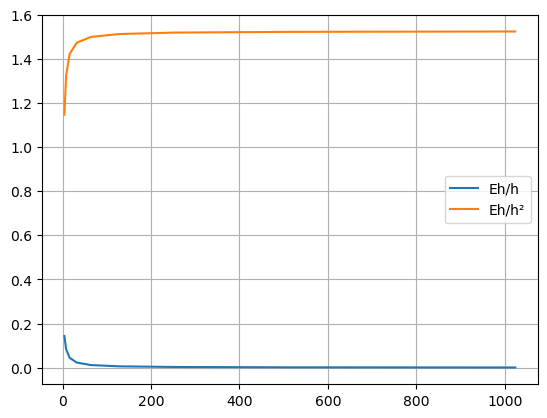

In [11]:
Eh = []
H = []
N = 2**np.arange(2,11)

for s in range(2,11):
    h = (1/2)/2**s
    tt,yy = mon_schema(t0, T, y0, h, f)
    err =  max(abs(yex(tt) - yy))
    H.append(h)
    Eh.append(err)

Eh = np.array(Eh)
H = np.array(H)

plt.plot(N,Eh/H,label=f'Eh/h')
plt.plot(N,Eh/H**2,label=f'Eh/h²')
plt.legend()
plt.grid()

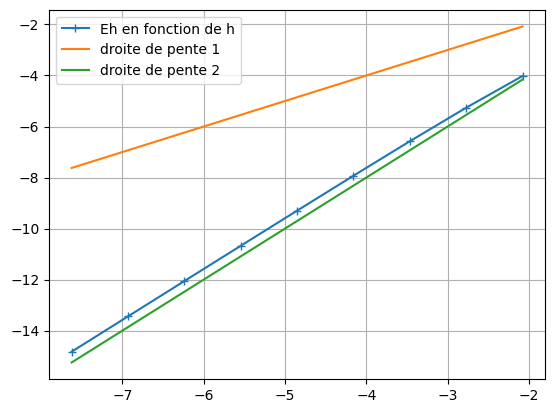

In [12]:
plt.plot(np.log(H),np.log(Eh),label='Eh en fonction de h',marker='+')
plt.plot(np.log(H),np.log(H),label='droite de pente 1')
plt.plot(np.log(H),2*np.log(H),label='droite de pente 2')
plt.legend()
plt.grid()

**Réponce question 3.3 : L'erreur global est nul à l'ordre 1 et est parallèle à la droite de pente 2. Donc le schéma est convergent d'odre 2.** 

## Partie 2. Comparaison de différentes méthodes numériques.

L'objectif de cette partie est de mettre en oeuvre différents schémas numériques pour approcher la solution d'une équation différentielle ordinaire, et de comprendre des notions comme l'ordre de précision d'une méthode numérique. 

**Quelques conseils pour l'organisation de vos programmes :** *vous allez programmer plusieurs schémas numériques et les tester sur plusieurs exemples d'EDO. Il est souhaitable de bien organiser votre programme pour ne pas se perdre. Par exemple vous pourrez définir au tout début les fonctions second membre des EDO que vous allez tester, en les appelant par exemple $f1,\ f2,\dots.$ Vos fonctions doivent avoir toujours deux variables, $t$ et $y$, même si elles ne dépendent pas de $t$ (comme ça les fonctions définissant les schémas seront adaptées à tous les cas).Vous pourrez ensuite définir les solutions exactes de ces équations, si elles sont connues, en les appelant par exemple $yex1,\ yex2,\dots$. Également, vous pouvez définir ensuite les fonctions que vous allez construire pour chacun des schémas. Lorsque vous faites appelle à une fonction pour tester un certain schéma dans une situation concrète, il faut définir avant les paramètres du cas que vous allez tester. Par exemple, faire*

`t0=0`

`tf=1`

`y0=2`

`h=0.5`

`euler_exp(f1, t0, tf, y0, h)`

*au lieu de*

`euler_exp(f1,0,1,2,0.5)`.

*Cela vous permet de facilement changer les paramètres s'il le faut, et la visibilité de votre programme sera aussi facilitée.*

On se donne alors le problème de Cauchy  
\begin{equation*}
(PC)\ \ \ \ \ \begin{cases}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0
\end{cases} 
\end{equation*}

où $f:\R\times\R^n\longrightarrow\R^n$ (si $n>1$, il s'agit d'un système d'équations différentielles).

Avec les mêmes notations de la partie 1, on va considérer les schémas numériques suivants pour approcher la solution exacte de ce problème :

-  **Euler explicite** : $y^{n+1}=y^{n}+h f(t_n,y^{n})$ ; 
  
-  **Euler implicite** : $y^{n+1}=y^{n}+h f(t_{n+1},y^{n+1})$  ;

-  **Heun** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(p_1+p_2\big)$, où
  $p_1=f(t_n,y^{n})$, $\ p_2=f(t_n+h,y^{n}+h p_1)$ ;

- **Crank-Nicolson** : $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_{n},y^{n})+f(t_{n+1},y^{n+1})\big)$ ;
- **Runge Kutta 4** : $y^{n+1}=y^{n}+\frac{h}{6}(p_1+2p_2+2p_3+p_4)$, où $p_1=f(t_n,y^{n})$, $\ p_2=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_1)$, $\ p_3=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_2)$ et 
$\ p_4=f(t_n+h,y^{n}+h p_3)$. 
- **Adams-Bashforth à deux pas** : $y^{n+1}=y^{n}+\frac{h}{2}\big(3f(t_n,y^{n})-f(t_{n-1},y^{n-1})\big)$.


**Exercice 1.** 

Écrire, pour chaque  schéma explicite à un pas, une fonction python de la forme

`nom_du_schema(t0, T, y0, h, fct)`

(ou de la forme `mon_schema(t0,T,y0,N,fct)`),
prenant en argument  l'instant initiale **t0**, la longueur **T** de l'intervalle de temps $[t_0,t_0+T],$ la donnée initiale $y_0$, le pas de temps $h$ (ou le nombre de points $N$) et la fonction `fct` définissant le second membre de l'EDO. Cette fonction devra retourner deux tableaux :  
- $[t_0,\, t_1,\, ...,\, t_N],$ tableau `numpy` unidimensionnel de taille $N+1$ représentant la subdivision de l'intervalle $[t_0,t_0+T]$ de pas $h$ considérée, 
- $[y^0,\, y^1,\, ...,\, y^N],$ tableau `numpy` de taille $(N+1)\times n$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N.$

In [13]:
#schémas implicites:
def Elr_imp(t0, T, y0, h, f):
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.empty((N+1))
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t[n+1],y[n+1])
    return t,y

def Crank(t0, T, y0, h, f):
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.empty((N+1))
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + (h/2) * (f(t[n],y[n]) + f(t[n+1],y[n+1]))
    return t,y

In [14]:
#schémas explicites:
def Elr_exp(t0, T, y0, h, f):  
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.zeros((N+1,len(y0)))
    y[0,] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t[n],y[n])
    return t,y

def Heun(t0, T, y0, h, f):
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.zeros((N+1,len(y0)))
    y[0,] = y0
    for n in range(N):
        p1 = f(t[n],y[n])
        p2 = f(t[n]+h, y[n]+h*p1)
        y[n+1] = y[n] + (h/2) * (p1+p2)
    return t,y

def RK4(t0, T, y0, h, f):
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.zeros((N+1,len(y0)))
    y[0,] = y0
    for n in range(N):
        p1 = f(t[n],y[n])
        p2 = f(t[n] + h/2, y[n] +(h/2)* p1)
        p2 = f(t[n] + h/2, y[n] +(h/2)* p1)
        p3 = f(t[n] + h/2, y[n] +(h/2)* p2)
        p4 = f(t[n] + h, y[n] + h* p2)
        y[n+1] = y[n] + (h/6) * (p1 + 2*p2 + 2*p3 + p4)
    return t,y

In [15]:
#schéma d'Adams-Bashforth à deux pas 
def Adams(t0, T, y0,y1, h, f):
    N = int(T/h)
    t = np.linspace(t0,t0+T,N+1)
    y = np.zeros((N+1,len(y0)))
    y[0,] = y0
    y[1,] = y1
    for n in range(1,N):
        y[n+1] = y[n] + (h/2) * (3*f(t[n],y[n]) - f(t[n-1],y[n-1]))
    return t,y

 **Exercice 2.** 

**Question 1.** Testez les schémas d'Euler explicite, d'Heun et RK4 sur le modèle logistique
$$
(P_1)\ \ \ \ 
\begin{cases}
y'(t)=c y (1 - \frac{y}{b}),\\
y(0)=a,
\end{cases}
$$
dont la solution exacte est
$$
y(t) = \frac{b}{1 + \frac{b-a}{a} e^{-ct}},
$$
avec les données $c=1$, $b=2$, $a=0.1$, dans l'intervalle $[0,15]$, avec un pas $h=0.2$. Tracer sur la même fenêtre la solution exacte et la solution approchée obtenue avec chacun des schémas. Tracer dans une autre figure, pour chacun des schémas, la différence en valeur absolue entre la solution exacte et la solution approchée. Quelle méthode semble être la meilleure ?


**Question 2.** Testez ensuite les 3 schémas dans le cas vectoriel $n>1$ ($n=2$) sur le problème
$$
(P_2)\ \ \ \
\begin{cases}
y''(t)  =    -y(t) + \cos(t)  \\
y(0)  =   5,\ \ y'(0)  =   1,  
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{1}{2} \sin(t) t  + 5 \cos(t) + \sin(t),
$$
dans l'intervalle $[0,15]$, avec un pas  $h=0.2$.

Pour ce faire, il faut écrire l'équation d'ordre 2 de $(P_2)$ sous la forme d'un système de deux équations d'ordre 1 dans les nouvelles variables $u(t)=y(t)$ et $v(t)=y'(t)$. On se ramènera alors à la résolution d'une équation de la forme
$$
X'=F(t,X),\ \ \ \textrm{avec}\ X=(u,v)=(y,y')^T.
$$
Représenter à nouveau la solution exacte et la solution approchée dans une même fenêtre graphique.

*La solution $y$ de $(P_2)$ correspond à la première composante du vecteur $X$ ci-dessus. Votre fonction `schema` retournera dans ce cas, si vous avez respecté la structure conseillée, un tableau de taille $(N+1)\times2$, $N$ étant le nombre de points de la discrétisation. Ce tableau donne les valeurs approchées de $X$ au points de la discrétisation considérée, la première colonne correspondant à la première composante de $X$, la seconde à la seconde composante de $X$. La solution approchée de $(P_2)$ que l'on cherche correspond alors à la première colonne de ce tableau.*

**Question 3.** Étude de l'erreur et convergence.

Considérons le problème
$$
(P_3)\ \ \ \
\begin{cases}
y'(t)=\frac{\cos(t)-y(t)}{1+t},\\
y(0)=-\frac14, 
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{\sin(t)-1/4}{1 + t}.
$$

Pour chacune des 3 méthodes (EE, Heun et RK4) :

**3.1** Calculez les solutions approchées de $(P_3)$ obtenues avec avec $h=1/2^s$ pour $s = 2,...,10$, sur l'intervalle de temps $[0,10]$. 

**3.2** Calculer, pour chaque valeur de $h=1/2^s,\ s = 1,2,...,10,$ l'erreur globale $E_h$.  
Représentez ensuite dans une même figure, l'erreur en fonction du pas de temps $h$ en échelle logarithmique  (autrement dit, représentez $\log(E_h)$ en fonction de $\log(h)$), pour chaque méthode. Vous devez obtenir des points qui sont à peu près alignés sur des droites. Vérifiez graphiquement que c'est le cas, en estimant la pente de la droite passant au plus prêt des points (ou en représentant des droites de pente $1,\ 2$ et $4$ qui passent par un des points et en vérifiant que tous les points sont à peu près sur ces droites).

*Si les points $(log(h),log(E_h))$ sont alignés sur une droite de pente $p$, ceci signifie que $\log(E_h) \sim C+p\log(h)=C+\log(h^p)$ et donc que $E_h\sim \widetilde{C}h^p$, pour certaines constantes $C$ et $\widetilde{C}$. On dit que la méthode est d'ordre p : c'est l'ordre de la puissance de $h^p$ dans cette relation. On a donc que l'erreur globale $E_h$ tend vers 0 comme $h^p$. L'ordre d'une méthode donne une indication sur sa vitesse de convergence. Une méthode d'ordre $p$ est une méthode dont l'erreur globale tend vers $0$ comme $h^p$. Donc plus l'ordre est élevé, plus la méthode converge plus vite*.


**Remarque** : *pour étudier numériquement l'ordre d'une méthode, on utilise souvent l'échelle logarithmique pour tracer l'erreur en fonction du pas de discrétisation $h$. La pente de la droite obtenue donne l'ordre $p$ de la méthode : si $E_h \sim Ch^p$ alors $\log(E_h)\sim \log(C) + p\log(h)$.*



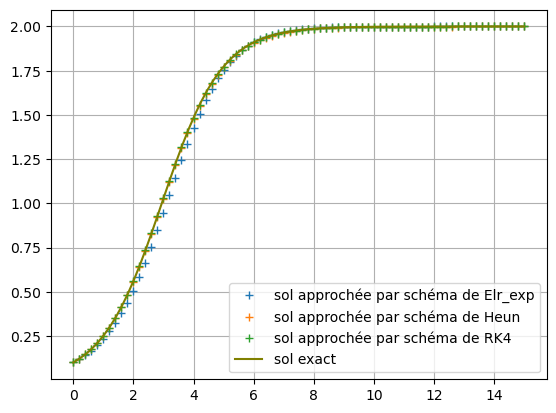

In [17]:
#paramètres
a,b,c = 0.1,2,1
y0 = np.array([a])
t0,T = 0,15
h = 0.2
N = int(T/h)

def P1(t,y):
    return c*y*(1-y/b)

def yex1(t):
    return b/ (1+(b-a)/a * np.exp(-c*t))
    
for schema in [Elr_exp,Heun,RK4]:
    tt,yy = schema(t0, T, y0, h, P1)
    plt.plot(tt,yy[:,0],'+',label=f'sol approchée par schéma de {schema.__name__}' )

t = np.linspace(t0,t0+T,N)

plt.plot(t,yex1(t),label='sol exact',color='olive')
plt.legend()
plt.grid()

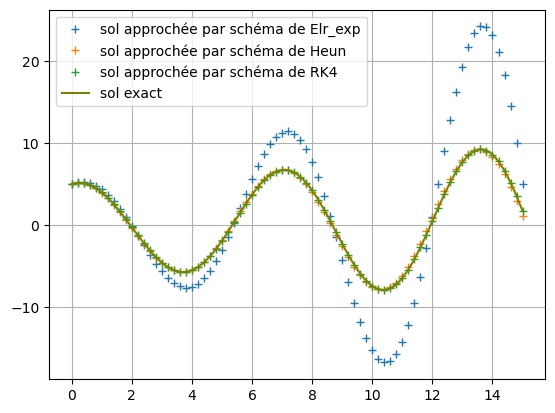

In [18]:
#paramètres
y0 = np.array([5,1])
t0,T = 0,15
h = 0.2
N = int(T/h)

def P2(t,y):
    Z = np.zeros_like(y)
    Z[0] = y[1]
    Z[1] = -y[0] + np.cos(t)
    return Z

def yex2(t):
    return np.sin(t)*t/2 + 5*np.cos(t) + np.sin(t)

for schema in [Elr_exp,Heun,RK4]:
    tt,yy = schema(t0, T, y0, h, P2)
    plt.plot(tt,yy[:,0],'+',label=f'sol approchée par schéma de {schema.__name__}' )
    
t = np.linspace(t0,t0+T,N)

plt.plot(t,yex2(t),label='sol exact',color='olive')
plt.legend()
plt.grid()

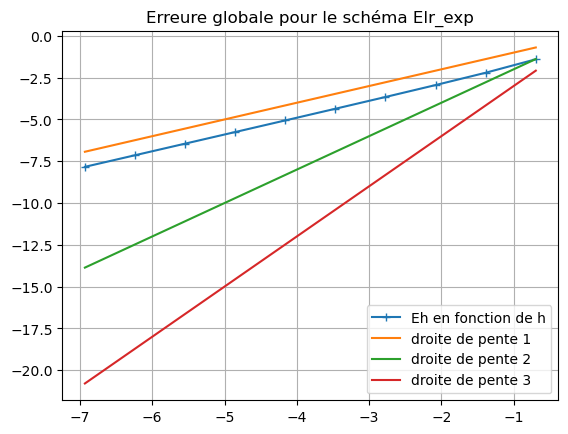

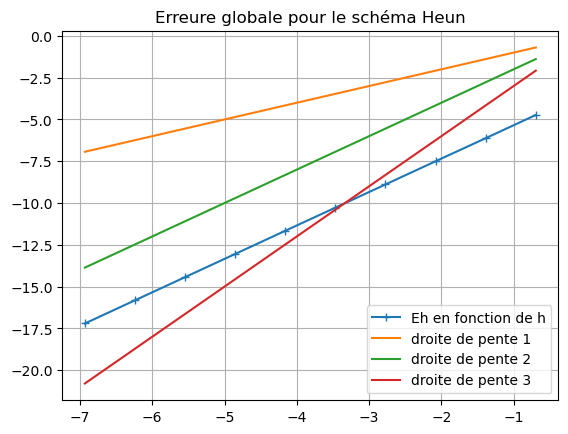

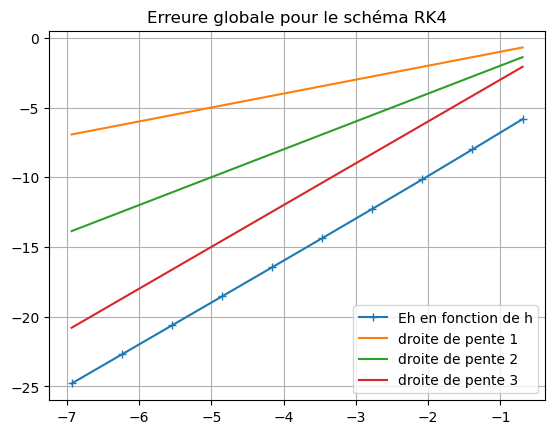

In [20]:
#paramètres
y0 = np.array([-1/4])
t0,T = 0,10
Eh1,Eh2,Eh3 = [],[],[]
H = []

def P3(t,y):
    return (np.cos(t) - y)/(1+t)

def yex3(t):
    return (np.sin(t) - 1/4)/(1+t)

for s in range(1,11):
    h = 1/2**s
    t = np.linspace(t0,t0+T,int(T/h)+1)
    tt1,yy1 = Elr_exp(t0, T, y0, h, P3)
    tt2,yy2 = Heun(t0, T, y0, h, P3)
    tt3,yy3 = RK4(t0, T, y0, h, P3)
    err1 =  max(abs(yex3(t) - yy1[:,0]))
    err2 =  max(abs(yex3(t) - yy2[:,0]))
    err3 =  max(abs(yex3(t) - yy3[:,0]))
    H.append(h)
    Eh1.append(err1)
    Eh2.append(err2)
    Eh3.append(err3)
    
    
Eh = np.array([Eh1,Eh2,Eh3])
for k,schema in enumerate([Elr_exp,Heun,RK4]):
    plt.figure()
    plt.plot(np.log(H),np.log(Eh[k]),label='Eh en fonction de h',marker='+')
    plt.plot(np.log(H),np.log(H),label='droite de pente 1')
    plt.plot(np.log(H),2*np.log(H),label='droite de pente 2')
    plt.plot(np.log(H),3*np.log(H),label='droite de pente 3')
    plt.title(f'Erreure globale pour le schéma {schema.__name__}')
    plt.legend()
    plt.grid()

**Exercice 3. Problèmes raides**

Nous nous intéressons ici au cas du modèle de Van der Pol :

- Le modèle de Van Der Pol 
$$
(P)\ \ \ \ 
\begin{cases}
y''(t)  =    (a-y(t)^2) y'(t) - y(t),\\
y(0)  =   \frac{1}{10},\ \ y'(0)  = 1,  
\end{cases}
$$
dont la solution analytique on ne sait pas calculer, même si elle existe (c'est une conséquence du théorème de Cauchy-Lipschitz). On prendra $a=5$ ou $a=8$, $[t_0,t_f] =[0, 20]$ dans les tests numériques.

**Remarque :** *il n'est pas simple de définir ce que c'est une équation raide. Il s'agit d'équations dont les solutions présentent de grandes variations initiales ou de systèmes d'équations où les échelles de variation des différentes inconnues sont très différentes. Il s'agit d'équations qui sont en général difficiles d'approcher avec des schémas explicites d'ordre bas.*

**Question 1.** Écrivez $(P)$ sous la forme d'un système différentiel de deux équations  d'ordre 1. 

**Question 2.** Testez tous les schémas explicites proposés lorsque l'on prend $a=8$, $t \in [0, 20]$ et $h=0.1,\, 0.05,\, 0.025$ ? Recommencer avec $a=5$. Commentez les résultats obtenus.


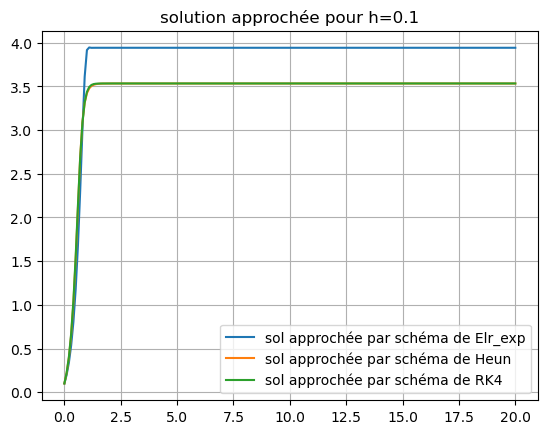

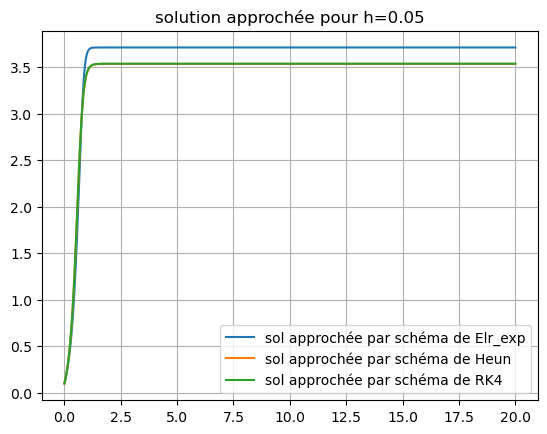

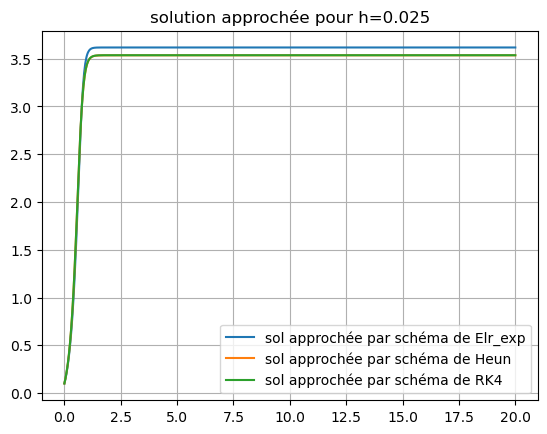

In [22]:
#paramètres
a = 5
y0 = np.array([1/10,1])
t0,T = 0,20
N = int(T/h)

def P(t,y):
    Z = np.zeros_like(y)
    Z[0] = y[1]
    Z[1] = (a-y[0]**2)*y[1] - y[1]
    return Z

for h in [0.1,0.05,0.025]:
    plt.figure()
    plt.title(f'solution approchée pour h={h}')
    for schema in [Elr_exp,Heun,RK4]:
        tt,yy = schema(t0, T, y0, h, P)
        plt.plot(tt,yy[:,0],label=f'sol approchée par schéma de {schema.__name__}' )
        plt.legend()
    plt.grid()

**Exercice 4. Méthodes multi-pas.** Les méthodes multi-pas, comme la méthode d'Adams-Bashforth, utilisent d'autres points que $(t^n,y(t^n))$ pour calculer une valeur approchée de $y(t^{n+1}).$ L'intérêt de ces méthodes est d'obtenir des méthodes d'ordre élévé pour une compléxité inférieure que les méthodes de Runge-Kutta.

Reprendre les questions de l'exercice précédent pour le schéma d'Adams-Bashforth. On remarque qu'il faut calculer $y^1$ par une autre méthode, on utilisera alors la méthode de Heun. Essayer d'établir numériquement l'ordre de la méthode. 


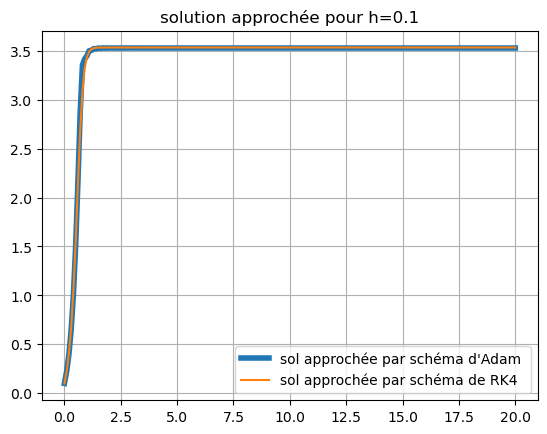

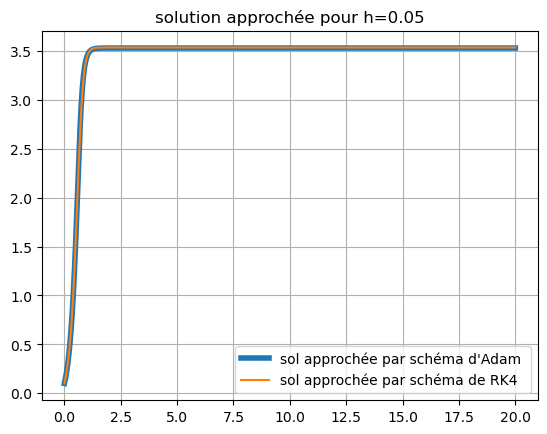

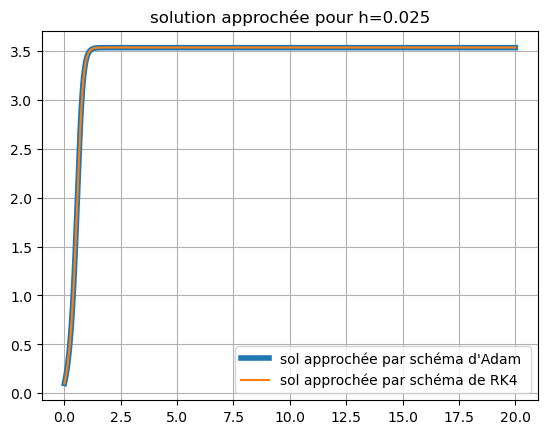

In [23]:
#paramètres
a = 5
y0 = np.array([1/10,1])
t0,T = 0,20
N = int(T/h)

def P(t,y):
    Z = np.zeros_like(y)
    Z[0] = y[1]
    Z[1] = (a-y[0]**2)*y[1] - y[1]
    return Z

for h in [0.1,0.05,0.025]:
    plt.figure()
    plt.title(f'solution approchée pour h={h}')
    t1,y1 = Heun(t0,T,y0,h,P)
    t2,y2 = RK4(t0,T,y0,h,P)
    yy1 = y2[1,]
    tt,yy = Adams(t0, T, y0, yy1, h, P)
    plt.plot(tt,yy[:,0],lw=4,label=f'sol approchée par schéma d\'Adam ' )
    plt.plot(t2,y2[:,0],label=f'sol approchée par schéma de RK4' )
    plt.legend()
    plt.grid()